# Question 1

## (a)

*Hint: use `seaborn.snsplot` to visualize data. use `np.corrcoef` to calculate the correlation matrix and use `seaborn.heatmap` to visualize the correlation matrix.*

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

       A    B    C    D    type  Start assignment
0    6.4  2.9  4.3  1.3   amide                 1
1    5.7  4.4  1.5  0.4  phenol                 2
2    6.7  3.0  5.2  2.3   ether                 0
3    5.8  2.8  5.1  2.4   ether                 1
4    6.4  3.2  5.3  2.3   ether                 0
..   ...  ...  ...  ...     ...               ...
145  5.4  3.9  1.3  0.4  phenol                 1
146  6.3  2.5  5.0  1.9   ether                 0
147  6.0  3.4  4.5  1.6   amide                 0
148  6.2  2.9  4.3  1.3   amide                 0
149  5.6  3.0  4.1  1.3   amide                 0

[150 rows x 6 columns]


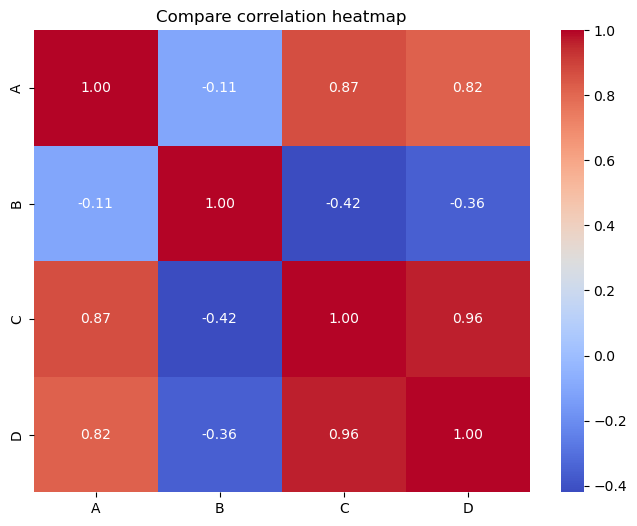

            A         B         C     D    type  Start assignment
0    0.810127  0.659091  0.623188  0.52   amide                 1
1    0.721519  1.000000  0.217391  0.16  phenol                 2
2    0.848101  0.681818  0.753623  0.92   ether                 0
3    0.734177  0.636364  0.739130  0.96   ether                 1
4    0.810127  0.727273  0.768116  0.92   ether                 0
..        ...       ...       ...   ...     ...               ...
145  0.683544  0.886364  0.188406  0.16  phenol                 1
146  0.797468  0.568182  0.724638  0.76   ether                 0
147  0.759494  0.772727  0.652174  0.64   amide                 0
148  0.784810  0.659091  0.623188  0.52   amide                 0
149  0.708861  0.681818  0.594203  0.52   amide                 0

[150 rows x 6 columns]


In [21]:
compounds_data = pd.read_csv('Datasets/compounds.csv')
print(compounds_data)
normalized_compounds = compounds_data.copy()
features = ['A', 'B', 'C', 'D']

for f in features:
    normalized_compounds.loc[:, f] = normalized_compounds.loc[:, f] / (normalized_compounds.loc[:, f].max())
    assert normalized_compounds.loc[:, f].all() <= 1 and normalized_compounds.loc[:, f].all() > 0
mat = normalized_compounds.iloc[:, 0:4].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Compare correlation heatmap")
plt.show()

print(normalized_compounds)

## (b)

### \[IMPORTANT\] Fill in and use the KMeans code below. DO NOT USE  `sklearn.cluster.KMeans`.

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

In [22]:
import warnings
from scipy.spatial.distance import cdist


class KMeans():
    def __init__(self, n_clusters, max_iter=100):
        self.k = n_clusters
        self.max_iter = max_iter
    
    def cluster(self, X):
        """
        Do K-Means clustering
        
        Parameters
        ----------
        X: np.ndarray
            Normalized input features, shape (n_samples, n_features)
        """
        centroids = np.random.random((self.k, X.shape[1]))
        assignments = np.zeros(X.shape[0])
        new_assignments = self.create_new_assignments(centroids, X)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        
        if len(np.unique(new_assignments)) < self.k:
            return self.cluster(X)
        
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.max_iter:
            # compute centroids
            for k in range(self.k):
                points_idx = np.where(new_assignments == k)[0]
                centroids[k] = np.mean(X[points_idx], axis=0)
            assignments = new_assignments
            # call the self.create_new_assignments
            new_assignments = self.create_new_assignments(centroids, X)
            if len(np.unique(new_assignments)) < self.k:
                warnings.warn('Warning: At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.max_iter:
                warnings.warn("Warning: Maximum number of iterations reached!")
        return new_assignments
            
        
    def create_new_assignments(self, centroids, X):
        """
        Assign each datapoint to its nearest centroid.
        
        Parameters
        ----------
        centroids: np.ndarray
            Centroid of each cluster, shape (n_clusters, n_features)
        X: np.ndarray
            Input features, shape (n_samples, n_features)
        
        Returns
        ------
        new_assignments: np.ndarray
            Index of cluster which each data point belongs to, shape (n_samples,)
        """
        # Compute the distances that stores the Eucledian distances between each datapoints and the centroid
        # shape (n_samples, n_clusters)
        # Hint: you can use cdist in scipy.spatial.distance. 
        # cdist doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
        centroids = centroids.astype(np.float64)
        X = X.astype(np.float64)
        distances = cdist(X, centroids, metric='euclidean')
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments

[0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 0]


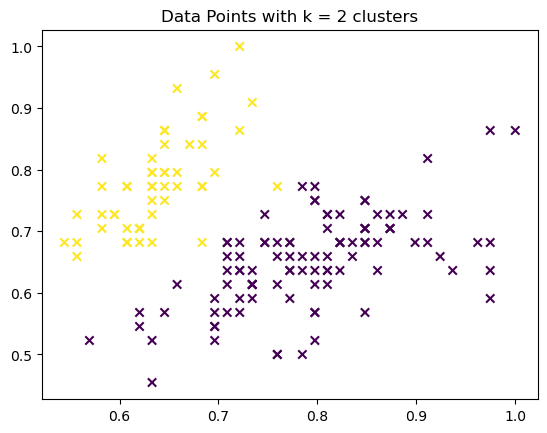

[1 2 1 0 1 2 0 1 0 1 1 1 2 1 2 2 1 1 1 2 2 0 0 0 2 1 2 2 2 1 1 2 1 2 0 0 2
 1 0 2 0 0 1 0 2 0 1 0 1 1 0 0 1 1 1 1 1 1 1 2 2 0 2 0 1 2 1 2 0 0 2 2 1 0
 0 2 0 0 0 0 0 2 2 0 0 1 0 0 0 1 0 0 2 2 2 2 1 1 1 2 0 1 0 0 0 2 2 2 2 0 1
 2 2 0 0 1 2 2 2 1 2 2 2 1 1 1 0 0 1 2 1 0 0 0 1 1 2 1 2 0 1 2 0 2 0 2 0 1
 0 0]


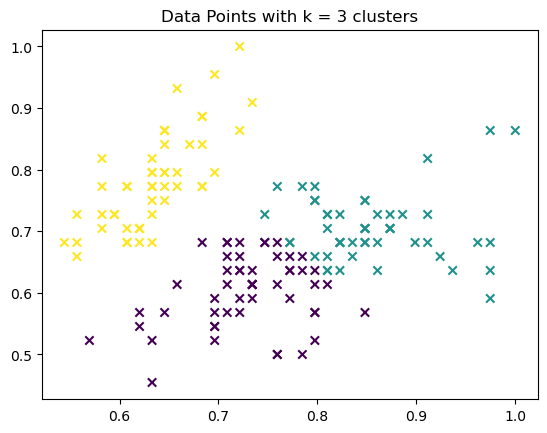

[0 3 0 1 0 2 1 0 1 0 0 0 3 0 2 2 0 0 0 2 3 1 1 1 3 0 2 2 2 0 0 3 0 2 1 1 2
 0 1 2 1 1 0 1 3 1 0 1 0 0 1 1 0 0 0 0 0 0 0 2 2 1 2 1 0 3 0 3 1 1 3 3 0 1
 1 2 1 1 1 1 1 2 3 1 1 0 1 1 1 0 1 1 3 2 3 3 0 0 0 3 1 0 1 1 1 2 2 3 3 1 0
 2 3 1 1 0 2 3 3 0 3 3 2 0 0 0 1 1 0 2 0 1 1 1 0 0 2 0 3 1 0 2 1 2 2 3 1 3
 1 1]


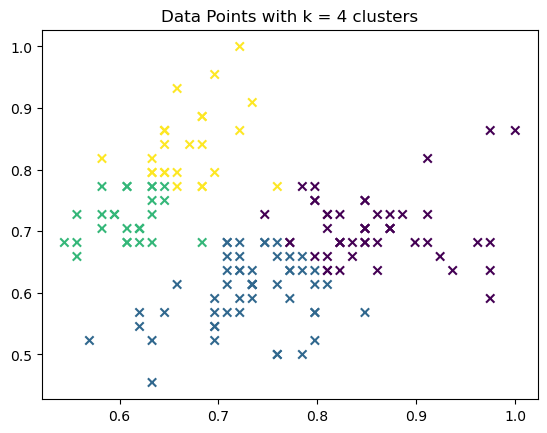

In [23]:
X = normalized_compounds.to_numpy()
for i in range(2, 5):
    km = KMeans(i)
    X = X[:, 0:2]
    res = km.cluster(X)
    assert len(res) == X.shape[0]
    plt.scatter(X[:, 0], X[:, 1], c=res, marker='x', label='Centroids')
    plt.title(f'Data Points with k = {i} clusters')
    plt.show()

# (b)
It seems like k = 3 makes the most sense.  It helps divide the bottom "clump" into 2 clusters since there is a lot of variance.

## (c)

### [IMPORTANT] Use the following function to validate your result. See the example in the docstring for usage.

*For debuuging: you will get output like (not the same as) this*:

```
Class 0 - amide: 48 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - phenol: 50 out of 50 are classified correctly
```

In [24]:
def validate(y_pred, y_true):
    """
    Validate the results of clustering
    
    Parameters
    ---------
    y_pred: np.ndarray
        Predicted clusters
    y_true: list or np.ndarray
        Ground truth clusters
    
    Example
    ------
    >>> validate(model.cluster(features), df['type'].values)
    """
    # correct classification
    compounds = np.unique(y_true) # should be ['amide','phenol','ether'] for compounds dataset
    clusters = [np.where(y_true == c)[0] for c in compounds]
    pred_class = np.unique(y_pred)
    
    #remove -1 for noise point in DBSCAN
    pred_class = np.delete(pred_class, np.where(pred_class == -1))
    assert len(pred_class) == len(compounds), \
        f'Predicted clusters has less or more than {len(compounds)} classes: {pred_class}'
    for i in range(3):
        #loop over solutions
        counts = []
        scores = []
        for j in range(3):
            # loop over clusters of true assignments
            sol_i = np.where(y_pred == pred_class[i])[0]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1] / len(clusters[j]))
        idx = np.argmax(scores)
        print(
            f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out of {len(clusters[j])}'
            ' are classified correctly'
        ) 

In [25]:
validate(KMeans(3).cluster(X[:, 0:4]), normalized_compounds['type'].values)

Class 0 - amide: 36 out of 50 are classified correctly
Class 1 - ether: 30 out of 50 are classified correctly
Class 2 - phenol: 49 out of 50 are classified correctly


## (d)

In [26]:
ntrials = 1000
count = 0
for i in range(ntrials):
    kmeans = KMeans(4) # Comment out the re-init code in KMeans
    results = kmeans.cluster(X[:, 0:2])
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

Out of 1000 number of KMeans trials, only 1000 gives 4 clusters


# (d)
When we calculate the mean to reassign a bad centroid, we can see that we are not able to because there are no points assigned to that centroid.  This is what triggers the division by zero error above.  So it is important to reassign centroids that have at least one point assigned to them, otherwise we have no starting point for reassigning an empty centroid.

# Question 2

## (a)

*Hint*:
+ Use `sklearn.cluster.DBSCAN` and adjust `eps`(Rcut) and `min_samples`(MinPts) parameters.**
+ Core points are stored in `core_sample_indices_` attribute.
+ Cluster results are stored in `labels_` attribute and noise points are labeled as -1.


In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=..., min_samples=...)
db.fit(...)
db.core_sample_indices_
db.labels_

InvalidParameterError: The 'eps' parameter of DBSCAN must be a float in the range (0.0, inf). Got Ellipsis instead.

## (b)

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

In [ ]:
from sklearn import datasets

def moon_dataset(n_samples=1500):
    """
    Generate datasets. We choose the size big enough to see the scalability
    of the algorithms, but not too big to avoid too long running times
    
    Parameters
    ---------
    n_samples: int
        Number of data points
    
    Returns
    ------
    X: np.ndarray
        Data points, shape (n_samples, 2)
    y: np.ndarray
        Clusters that each point belongs to, shape (n_samples)
    """
    np.random.seed(0)
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
    X, y = noisy_moons
    return X, y

X, y = moon_dataset()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

# Question 3

## (a)

In [ ]:
...

## (b)

In [ ]:
...

## (c)

*For debugging: should be 596.4585801741025*

In [ ]:
# If you feel the code is slow in Q3(d), use numba to accelerate it
# import numba

# @numba.njit()
def cost_func(features, centroids, clusters):
    """
    Parameters
    ----------
    features: np.ndarray
        Feature matrix, shape (n_samples, n_features). In the compound dataset, n_features = 4.
    centroids: np.ndarray
        Centroids of each cluster, shape (n_cluster, n_features). In this question, n_cluster = 3.
    clusters: np.ndarray
        Cluster which each datapoint belongs to. shape (n_samples,)
    """
    ...

## (d)

*For debugging*: 
+ Cooling schedule should be like: `array([500. , 499.5, 499.0005, ..., 3.37065784, 3.36728719, 3.3639199])`
+ Cost function can drop to around 540 (or even smaller).

In [ ]:
def SA(features, cluster, schedule, report_interval=100):
    """
    Simulated Annealing for clustering
    
    Parameters
    ----------
    features: numpy.ndarray
        Feature matrix. shape (n_samples, n_features)
    cluster: numpy.ndarray
        Initial guess of clusters. shape (n_samples,)
    schedule: numpy.ndarray
        Cooling schedule.
    report_interval: int
        Interval of steps to report result
    
    Returns
    ------
    res: dict
        Result containing the best clustering with the cost function value
    """
    # calculate the centroids
    centroids = ...
    # calulate the cost fucntion
    cluster_eval = ...
    
    best_cluster = cluster.copy()
    lowest_eval = cluster_eval

    for step, temp in enumerate(schedule):
        if step % report_interval == 0:
            print(step, temp, lowest_eval)
        for n in range(features.shape[0]):
            trial = cluster.copy()
            # Do a Metroplis step by swtiching a sample to differenct cluster
            choices = [0, 1, 2]
            choices.remove(...) # remove the current cluster
            rand_choice = ... # choose a different cluster
            trial[n] = ... # switch the cluster
            
            # calculate the centroids & cost function
            trial_centroids = ...
            trial_eval = ...
            # Metroplis rule
            if ...:
                cluster = trial
                cluster_eval = trial_eval
                if trial_eval < lowest_eval:
                    best_cluster = cluster.copy()
                    lowest_eval = cluster_eval
                    
    return {"solution": best_cluster, "evaluation": lowest_eval}

In [ ]:
def geometric_cooling(init_temp, num_steps, alpha):
    return ...

In [ ]:
for i in range(3):
    print(f"## Trial {i} ##")
    res = ...
    validate(...)